# Testing the Validation Data and Evaluating the Result

### Objectives

#### 1. Loading the Trained Model
#### 2. Calculating Joint Probability
#### 3. Making Predication for Validation Data
#### 4. Evaluating the Prediction
#### 5. Visualization of the Metric Evaluation
#### 6. Confusion Matrix¶

## Notebook Imports

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix

%matplotlib inline

## File Paths


In [44]:
#----- Manually Added Files

VALIDATION_CLASS_PATH = 'Validation_Data/Validation_Class.csv'
VALIDATION_DATA_PATH = 'Validation_Data/Validation_Statement.csv'


#----- Files Generated in Previous Steps

PREAMBLE_WORD_PROB = 'Trained_Model/preamble_word_prob.txt'
LENDER_DEFAULTING_WORD_PROB = 'Trained_Model/lender_defaulting_word_prob.txt' 
GOVERNING_LAW_WORD_PROB = 'Trained_Model/governing_law_word_prob.txt' 
INDEMNIFICATION_WORD_PROB = 'Trained_Model/indemnification_word_prob.txt'
OTHER_WORD_PROB = 'Trained_Model/other_word_prob.txt'
WORD_PROB = 'Trained_Model/word_prob.txt'
PROB_CLASS_PATH = 'Trained_Model/prob_class.txt'
VALIDATION_SPARSE_MATRIX_TXT_PATH = 'Validation_Data/Validation_Data_Sparse_Matrix.txt'
VALIDATION_CLASS_SPARSE_MATRIX_TXT_PATH = 'Validation_Data/Validation_Class_Sparse_Matrix.txt'
VALIDATION_DATA_FULL_MATRIX =  'Validation_Data/Validation_Data_Full_Matrix.txt'


#------ Files Generated in Current Step

VALIDATION_PREDICTION_DATA_PATH = 'Validation_Data/Validation_Prediction.csv'

## Constants

In [45]:
Preamble_classification_id = 0
Lender_defaulting_classification_id = 1
Governing_law_classification_id = 2
Indemnification_classification_id = 3
Other_classification_id = 4

LABEL_NAMES = ['Preamble', 'Lender Defaulting', 'Governing Law', 'Indemnification', 'Other']

## Load the Data

In [46]:
validation_data = np.loadtxt(VALIDATION_DATA_FULL_MATRIX , delimiter = ' ')
validation_class = np.loadtxt(VALIDATION_CLASS_SPARSE_MATRIX_TXT_PATH , delimiter = ' ',dtype=int)

prob_word_preamble = np.loadtxt(PREAMBLE_WORD_PROB, delimiter = ' ')
prob_word_lender_defaulting = np.loadtxt(LENDER_DEFAULTING_WORD_PROB, delimiter = ' ')
prob_word_governing_law = np.loadtxt(GOVERNING_LAW_WORD_PROB, delimiter = ' ')
prob_word_indemnification = np.loadtxt(INDEMNIFICATION_WORD_PROB, delimiter = ' ') 
prob_word_other = np.loadtxt(OTHER_WORD_PROB, delimiter = ' ') 
prob_word = np.loadtxt(WORD_PROB, delimiter = ' ')
prob_class = np.loadtxt(PROB_CLASS_PATH, delimiter = ' ')

## Calculating the Join Probability 
$$P(Class \, | \, Word) = \frac{P(Word \, | \, Class) \, P(Class)} {P(Word)}$$

In [47]:
joint_log_preamble = validation_data.dot(np.log(prob_word_preamble) - np.log(prob_word)) + np.log(prob_class[Preamble_classification_id])
joint_log_preamble_list =[]
for item in joint_log_preamble:
    joint_log_preamble_list.append(item)
    
joint_log_preamble_list    

[2.348407686504456,
 -8.314579871803987,
 -8.733055056747684,
 -9.162049568980185,
 -1.8318220701223387]

In [48]:
joint_log_lender_defaulting = validation_data.dot(np.log(prob_word_lender_defaulting) - np.log(prob_word)) + np.log(prob_class[Lender_defaulting_classification_id])
joint_log_lender_defaulting_list =[]
for item in joint_log_lender_defaulting:
    joint_log_lender_defaulting_list.append(item)
joint_log_lender_defaulting_list

[-8.318647477716384,
 6.189120976622943,
 -8.178890809824924,
 -7.57764611622247,
 -3.6020687878063304]

In [49]:
joint_log_governing_law = validation_data.dot(np.log(prob_word_governing_law) - np.log(prob_word)) + np.log(prob_class[Governing_law_classification_id])
joint_log_governing_law_list =[]
for item in joint_log_governing_law:
    joint_log_governing_law_list.append(item)
joint_log_governing_law_list

[-14.974368145804618,
 -8.13784037611085,
 -9.311287495680716,
 -1.4198206787292713,
 -12.043536911716103]

In [50]:
joint_log_indemnification = validation_data.dot(np.log(prob_word_indemnification) - np.log(prob_word)) + np.log(prob_class[Indemnification_classification_id])
joint_log_indemnification_list =[]
for item in joint_log_indemnification:
    joint_log_indemnification_list.append(item)
joint_log_indemnification_list

[-7.0486834064277915,
 -7.023990793837419,
 2.688617391785132,
 -9.273027312691568,
 -7.301640799622183]

In [51]:
joint_log_other = validation_data.dot(np.log(prob_word_other) - np.log(prob_word)) + np.log(prob_class[Other_classification_id])
joint_log_other_list =[]
for item in joint_log_other:
    joint_log_other_list.append(item)
joint_log_other_list

[-14.484542002356688,
 -6.730765187346953,
 -10.155862011302808,
 -9.153097999223002,
 -12.382920766452543]

In [52]:
join_prob = np.array([joint_log_preamble_list,joint_log_lender_defaulting_list,joint_log_governing_law_list,joint_log_indemnification_list,joint_log_other_list],dtype=object)
join_prob=join_prob.transpose()
join_prob

array([[2.348407686504456, -8.318647477716384, -14.974368145804618,
        -7.0486834064277915, -14.484542002356688],
       [-8.314579871803987, 6.189120976622943, -8.13784037611085,
        -7.023990793837419, -6.730765187346953],
       [-8.733055056747684, -8.178890809824924, -9.311287495680716,
        2.688617391785132, -10.155862011302808],
       [-9.162049568980185, -7.57764611622247, -1.4198206787292713,
        -9.273027312691568, -9.153097999223002],
       [-1.8318220701223387, -3.6020687878063304, -12.043536911716103,
        -7.301640799622183, -12.382920766452543]], dtype=object)

## Making Predictions for Validation Data

In [68]:
prediction = join_prob.argmax(1)
prediction=prediction.transpose()
prediction_label_list=[]
for item in prediction:
    prediction_label_list.append(LABEL_NAMES[item])
prediction_label_list

['Preamble',
 'Lender Defaulting',
 'Indemnification',
 'Governing Law',
 'Preamble']

## Storing the Predicted Data in the form of a DataFrame

In [54]:
actual_class_list = []
for item in validation_class:
    actual_class_list.append(LABEL_NAMES[item])

validation_statement = pd.read_csv(VALIDATION_DATA_PATH)
validation_statement['PREDICTED CLASS'] = prediction_label_list
validation_statement['ACTUAL CLASS'] = actual_class_list
validation_statement




,STATEMENT,PREDICTED CLASS,ACTUAL CLASS
0,This CREDIT AGREEMENT is made and entered into...,Preamble,Preamble
1,Defaulting Lender’s right to approve or disapp...,Lender Defaulting,Lender Defaulting
2,The Loan Parties shall indemnify the Administr...,Indemnification,Indemnification
3,This agreement and other loan documents shall ...,Governing Law,Governing Law
4,The Borrower and certain lenders and agents ar...,Preamble,Other


In [55]:
validation_statement.to_csv(VALIDATION_PREDICTION_DATA_PATH)

## Metrics And Evaluation

### Accuracy

In [56]:
correct_docs = (validation_class == prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = validation_data.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_wrong)

Docs classified correctly 4
Docs classified incorrectly 1


In [57]:
accuracy = correct_docs / (correct_docs + numdocs_wrong) * 100
print(f' The Model Accuracy is {accuracy}%')

 The Model Accuracy is 80.0%


## Confusion Matrix

In [58]:
conf_matrix = confusion_matrix(y_true=validation_class, y_pred=prediction)
conf_matrix

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0]], dtype=int64)

In [59]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

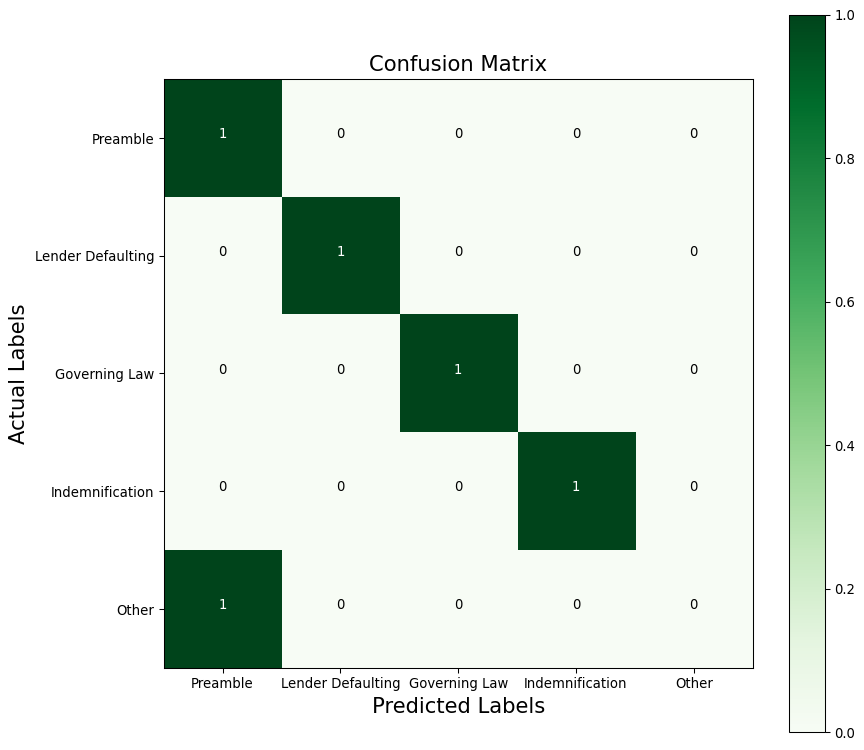

In [60]:
plt.figure(figsize=(10,10), dpi=95)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=16)

tick_marks = np.arange(nr_rows)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
            color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')
    

plt.show()

In [61]:
true_positives = np.diag(conf_matrix)
true_positives

array([1, 1, 1, 1, 0], dtype=int64)

In [62]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall = recall[~np.isnan(recall)]    # ------ removing 0/0 cases
recall                   

array([1., 1., 1., 1., 0.])

In [63]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision = precision[~np.isnan(precision)]   # ------ removing 0/0 cases
precision 

<ipython-input-63-0fa5667eded6>:1: RuntimeWarning: invalid value encountered in true_divide
  precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)


array([0.5, 1. , 1. , 1. ])

In [64]:
avg_recall = np.mean(recall)
print(f'The Model recall score is {avg_recall:.2%}')

The Model recall score is 80.00%


In [65]:
avg_precision = np.mean(precision)
print(f'The Model precision score is {avg_precision:.2%}')

The Model precision score is 87.50%


In [66]:
f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'The Model f1 score is {f1_score:.2%}')

The Model f1 score is 83.58%
